[WARN] -- Incomplete predictions for 120_LSTM_3L_Downsampled_AllEnergies_NoCuts: validation_data... You may want to recalculate this
[WARN] -- Incomplete predictions for 120_LSTM_3L_Downsampled_AllEnergies_0_5VEM: final_predictions... You may want to recalculate this
[WARN] -- Incomplete predictions for 120_LSTM_3L_Downsampled_AllEnergies_1_0VEM: final_predictions... You may want to recalculate this


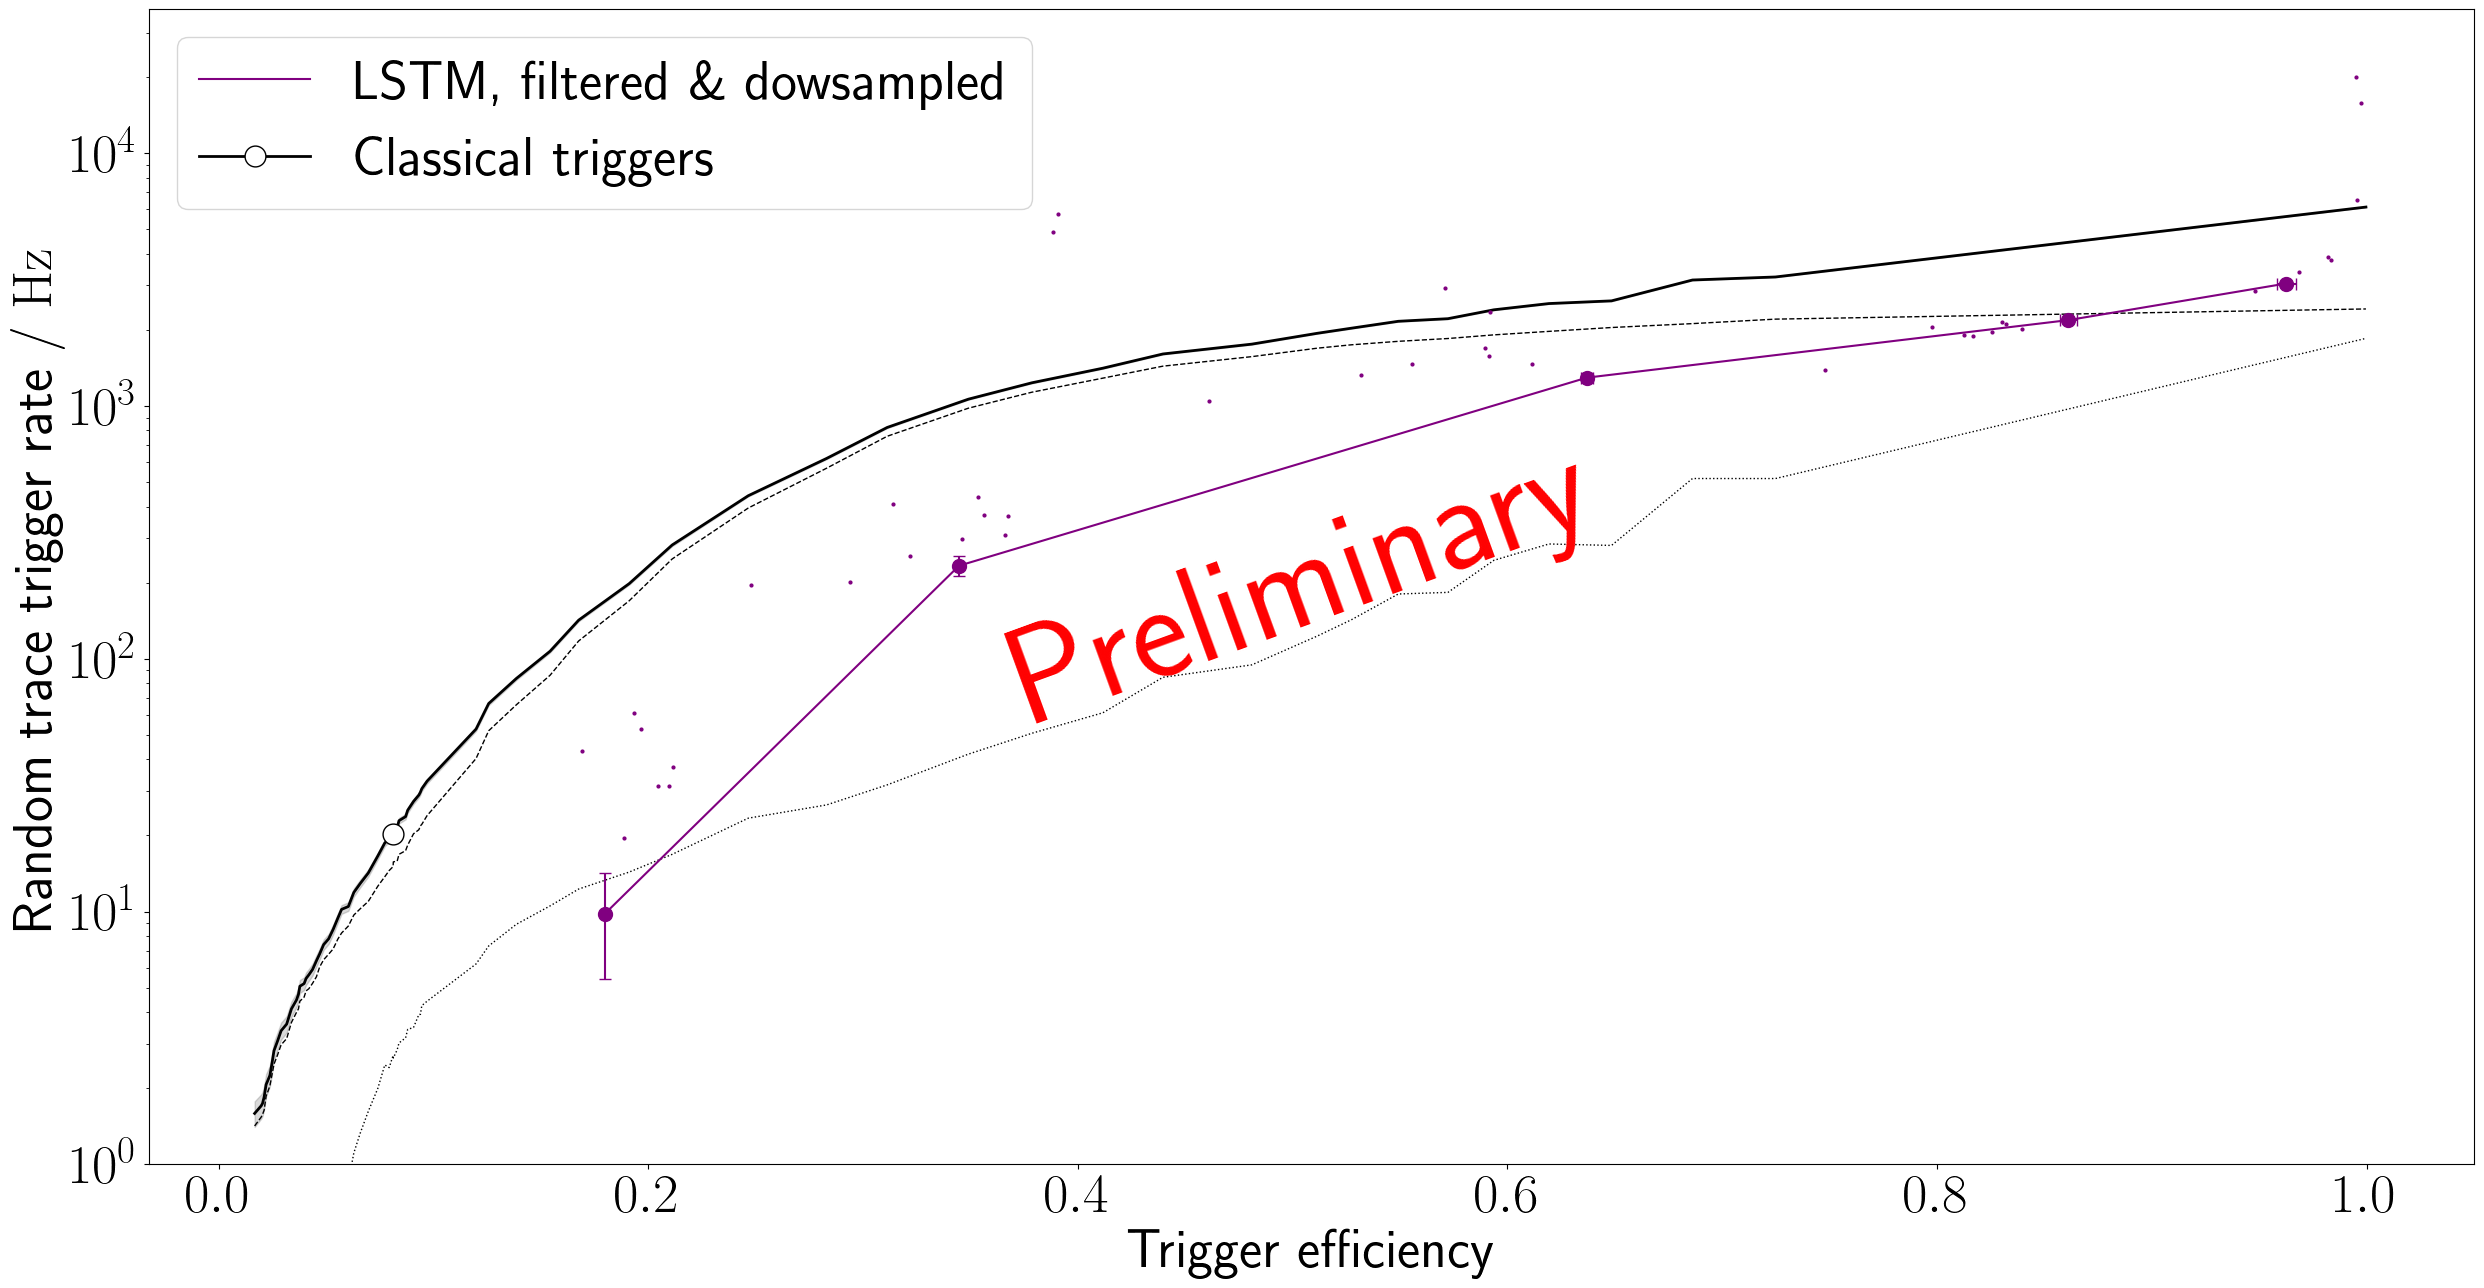

In [6]:
from Binaries import *

Plot = MoneyPlot("")

# Plot.add("120_TwoLayer_Downsampled_AllEnergies_NoCuts", "validation_data", color = "steelblue")
# for i_ch in ["0_2", "0_5", "1_0", "2_0", "5_0", "8_0"]:
#     Plot.add(f"120_TwoLayer_Downsampled_AllEnergies_{i_ch}VEM", "validation_data_no_cuts", color = "steelblue")
# Plot.draw_line(color = "steelblue", label = "CNN, all energies, filtered \& downsampled")


# Plot.add("120_TwoLayer_Downsampled_HighEnergies_NoCuts", "validation_data", color = "red")
# for i_ch in ["0_2", "0_5", "1_0", "2_0", "5_0", "8_0"]:
#     Plot.add(f"120_TwoLayer_Downsampled_HighEnergies_{i_ch}VEM", "all_energies_no_cuts", color = "red")
# Plot.draw_line(color = "red", label = "CNN, high energies, filtered \& downsampled", ls = "--")


# Plot.add("120_TwoLayer_FullBandwidth_AllEnergies_NoCuts", "validation_data", color = "orange")
# for i_ch in ["0_2", "0_5", "1_0", "2_0", "5_0", "8_0"]:
#     Plot.add(f"120_TwoLayer_FullBandwidth_AllEnergies_{i_ch}VEM", "validation_data_no_cuts", color = "orange")
# Plot.draw_line(color = "orange", label = "CNN, all energies, full bandwidth traces", ls = ":")


# Plot.add("120_TwoLayer_FullBandwidth_HighEnergies_NoCuts", "all_energies", color = "green")
# for i_ch in ["0_2", "0_5", "1_0", "2_0", "5_0", "8_0"]:
#     Plot.add(f"120_TwoLayer_FullBandwidth_HighEnergies_{i_ch}VEM", "all_energies_no_cuts", color = "green")
# Plot.draw_line(color = "green", label = "CNN, high energies, full bandwidth traces", ls = "dashdot")


Plot.add("120_LSTM_3L_Downsampled_AllEnergies_NoCuts", "validation_data", color = "purple")
for i_ch in ["0_5", "1_0", "2_0", "5_0"]:
    Plot.add(f"120_LSTM_3L_Downsampled_AllEnergies_{i_ch}VEM", "final_predictions", color = "purple")
Plot.draw_line(color = "purple", ls = "solid", label = "LSTM, filtered \& dowsampled")

plt.text(0.5, 0.5, "Preliminary", rotation = 20, transform = plt.gca().transAxes, color = "red", fontsize = 100, 
         verticalalignment = "center",
         horizontalalignment = "center")

Plot()

In [4]:
from Binaries import *

Container = Ensemble("120_LSTM_3L_Downsampled_AllEnergies_5_0VEM", supress_print = True)

BestModel = Container.get_best_model("final_predictions")
# BestModel.spd_energy_efficiency("final_predictions")
# print(BestModel.name)

bin_mock, eff_mock = BestModel.do_t3_simulation("final_predictions", 1e6)
Trigger = HardwareClassifier()

bin_mock, eff_mock = BestModel.do_t3_simulation("final_predictions", 1e6)
bin_trig, eff_trig = Trigger.do_t3_simulation("final_all_triggers", 1e6)

/tmp/ipykernel_3502760/1710008545.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cmap.get_cmap("plasma")
/tmp/ipykernel_3502760/1710008545.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "--o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(bin_mock, trig, c = c, fmt = "--o", markersize = 10, marker = "s")
/tmp/ipykernel_3502760/1710008545.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "--o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar([], [], c = "k", fmt = "--o", markersize = 10, marker = "s", label = "Classical triggers")


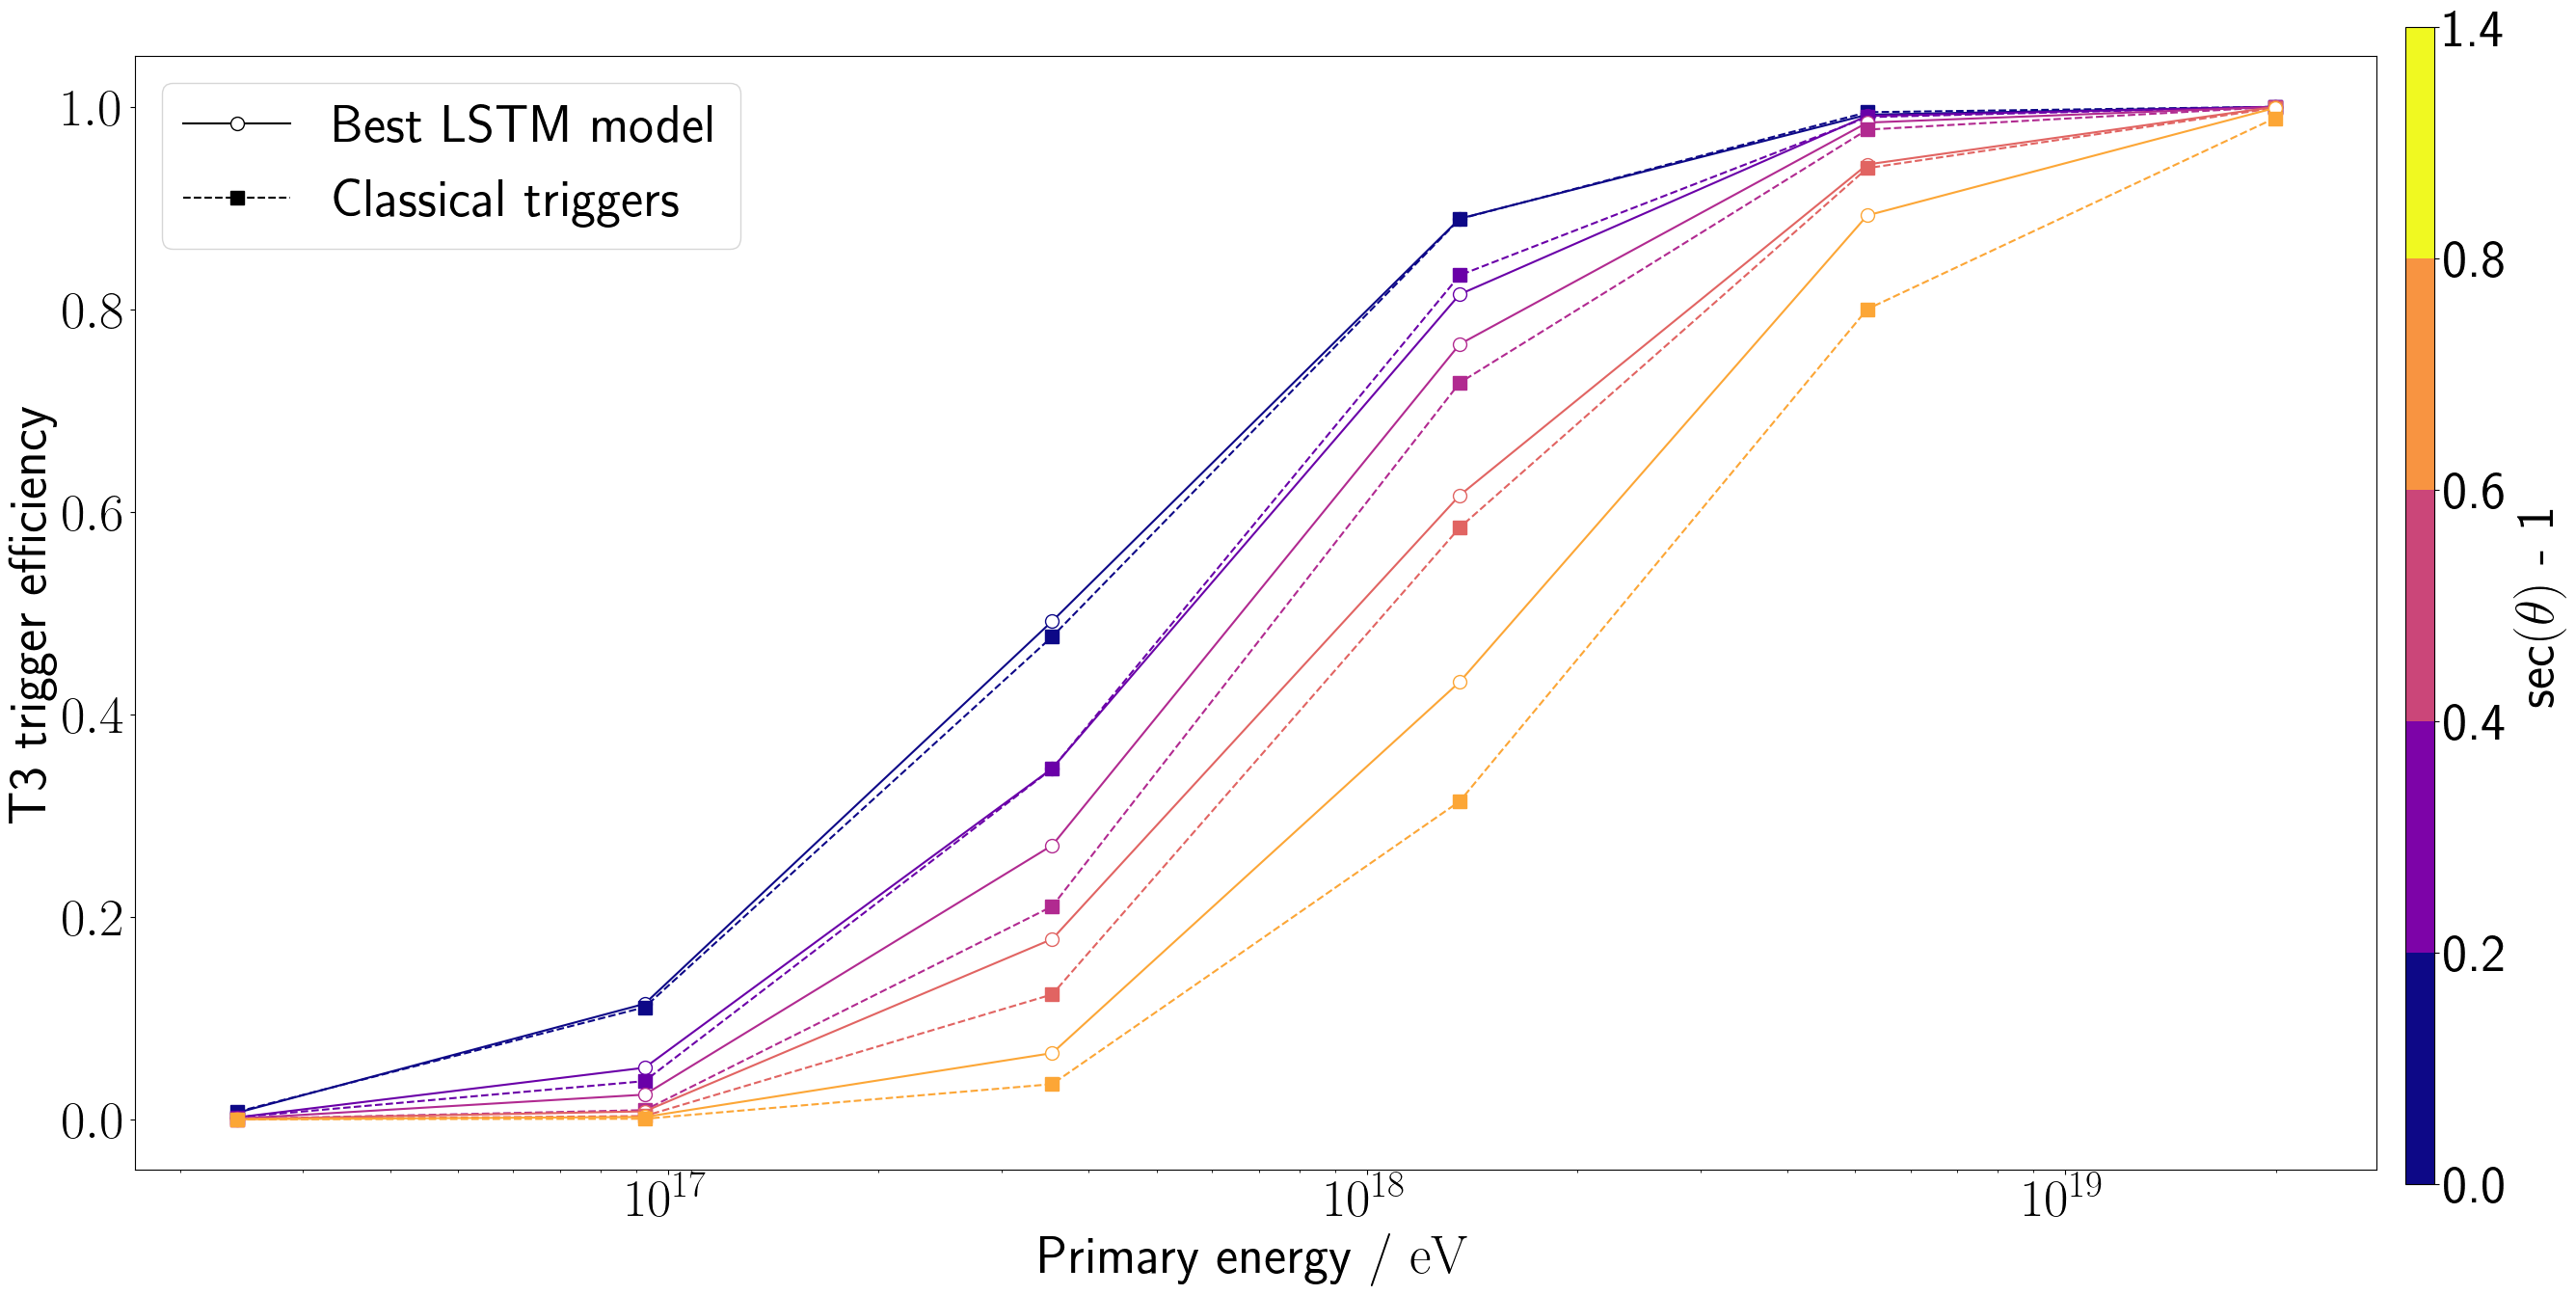

In [4]:
fig = plt.figure()
colormap = cmap.get_cmap("plasma")

for t, (mock, trig) in enumerate(zip(eff_mock, eff_trig)):
    c = colormap(t / len(eff_mock))

    plt.errorbar(bin_mock, mock, c = c, fmt = "-o", markersize = 10, mfc = "w")
    plt.errorbar(bin_mock, trig, c = c, fmt = "--o", markersize = 10, marker = "s")

plt.errorbar([], [], c = "k", fmt = "-o", markersize = 10, mfc = "w", label = "Best LSTM model")
plt.errorbar([], [], c = "k", fmt = "--o", markersize = 10, marker = "s", label = "Classical triggers")
plt.xlabel("Primary energy / $\mathrm{eV}$")
plt.ylabel("T3 trigger efficiency")
plt.xscale("log")
plt.legend()

norm = BoundaryNorm([0.00, 33.56, 44.42, 51.32, 56.25, 65.37], colormap.N)
ax2 = fig.add_axes([0.91, 0.1, 0.01, 0.8])

cbar = ColorbarBase(ax2, cmap=colormap, norm=norm, label = r"sec$(\theta)$ - 1")
cbar.set_ticks([0.00, 33.56, 44.42, 51.32, 56.25, 65.37])
cbar.set_ticklabels(["0.0", "0.2", "0.4", "0.6", "0.8", "1.4"])

In [1]:
from Binaries import *

Container = Ensemble("120_LSTM_3L_Downsampled_AllEnergies_5_0VEM", supress_print = True)

BestModel = Container.get_best_model("final_predictions")
BestModel.signal_efficiency("final_predictions")


Classifier                                    Dataset                                  TP      FP      TN      FN
ENSEMBLES/120_LSTM_3L_Downsampled_AllEne...   final_predictions                     25180       1       1   24892 -> ACC =  50.29%


IndexError: list index out of range

[WARN] -- Incomplete predictions for 120_TwoLayer_FullBandwidth_AllEnergies_4Muon: validation_data_no_cuts... You may want to recalculate this
[WARN] -- Incomplete predictions for 120_TwoLayer_FullBandwidth_AllEnergies_8Muon: validation_data_no_cuts... You may want to recalculate this


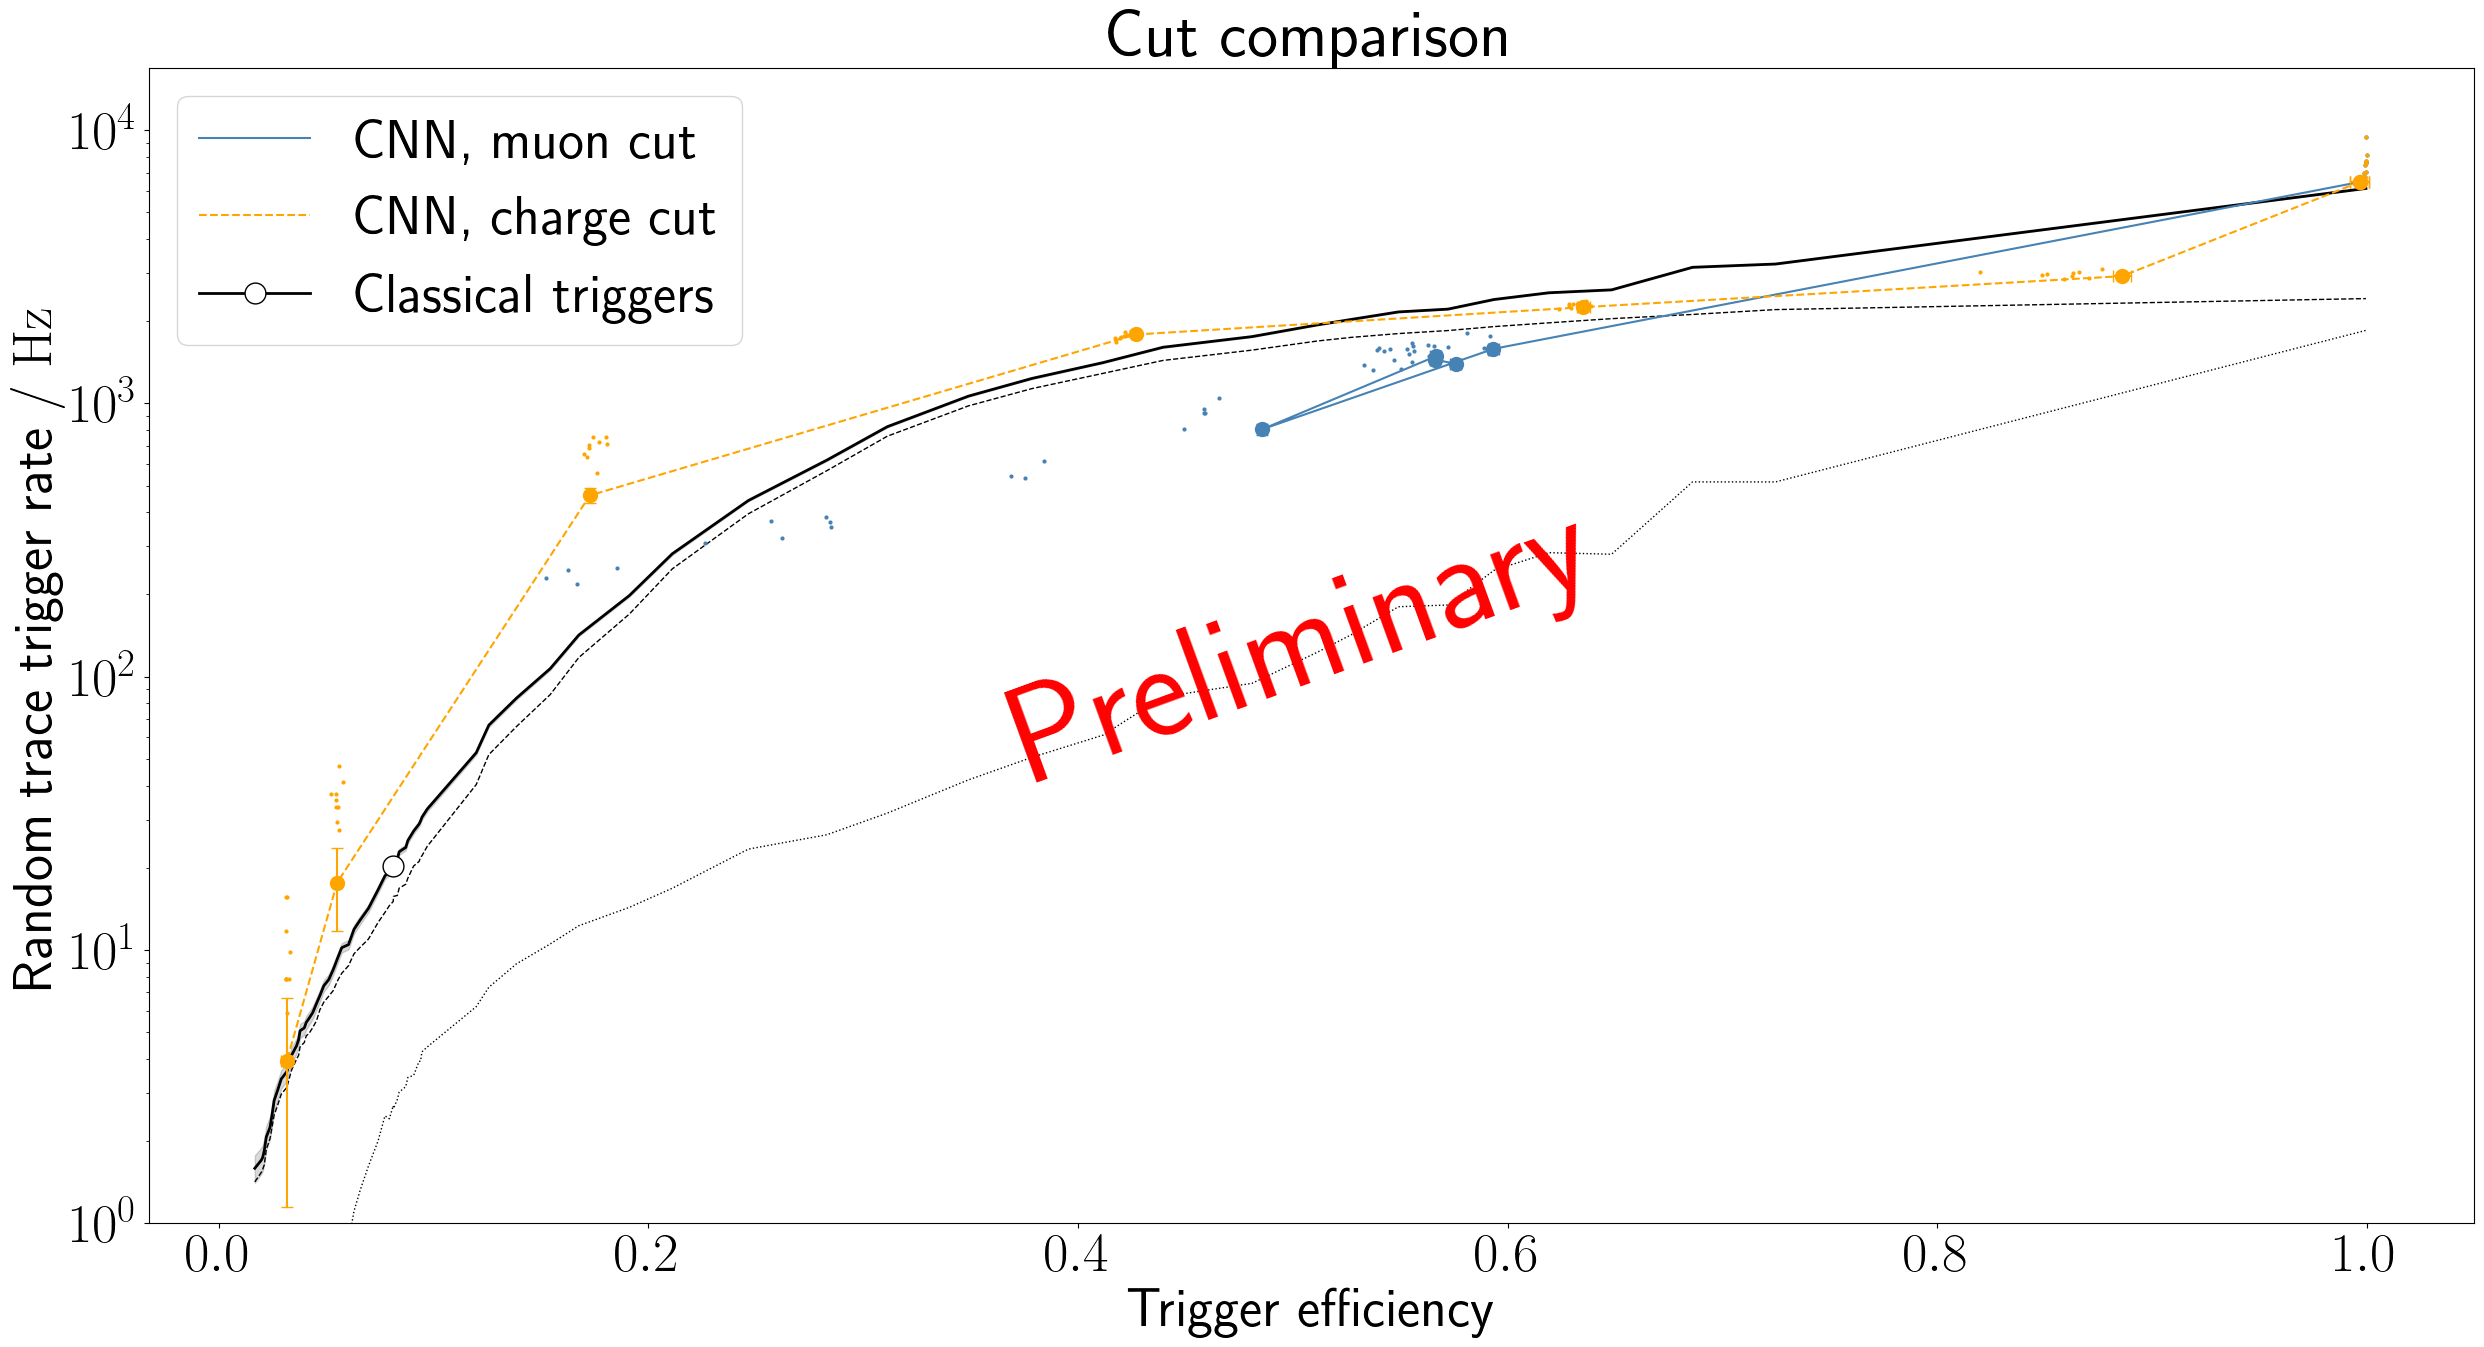

In [2]:
from Binaries import *

Plot = MoneyPlot("Cut comparison")

# Plot.add(AllEnergies, "validation_data")
Plot.add("120_TwoLayer_FullBandwidth_AllEnergies_NoCuts", "validation_data")

# 8 Muons NOT contained due to rate calculation not being finished yet
for i_muon in [1, 2, 4, 8, 16]:
    Plot.add(f"120_TwoLayer_FullBandwidth_AllEnergies_{i_muon}Muon", "validation_data_no_cuts", color = "steelblue")

Plot.draw_line(label = "CNN, muon cut", color = "steelblue")

Plot.add("120_TwoLayer_FullBandwidth_AllEnergies_NoCuts", "validation_data", color = "orange")
for i_charge in ["0_2", "0_5", "1_0", "2_0", "5_0", "8_0"]:
    Plot.add(f"120_TwoLayer_FullBandwidth_AllEnergies_{i_charge}VEM", "validation_data_no_cuts", color = "orange")

Plot.draw_line(label = "CNN, charge cut", color = "orange", ls = "--")

plt.text(0.5, 0.5, "Preliminary", rotation = 20, transform = plt.gca().transAxes, color = "red", fontsize = 100, 
         verticalalignment = "center",
         horizontalalignment = "center")

Plot()

# Charge cuts seem to behave better, maybe a hybrid cut could work?

In [8]:
root_path = "/cr/data01/filip/models/ENSEMBLES"

for dir in os.listdir(root_path):
    if "8Muon" in dir: continue
    for ensemble in os.listdir(os.path.join(root_path, dir)):
        name, no = ensemble.split("_")

        if len(no) != 2:
            no_padded = "0" + no

            print(f"mv {root_path}/{dir}/{name}_{no} {root_path}/{dir}/{name}_{no_padded}")
            os.system(f"mv {root_path}/{dir}/{name}_{no} {root_path}/{dir}/{name}_{no_padded}")

            # raise StopIteration

mv /cr/data01/filip/models/ENSEMBLES/120_TwoLayer_FullBandwidth_AllEnergies_1Muon/ensemble_2 /cr/data01/filip/models/ENSEMBLES/120_TwoLayer_FullBandwidth_AllEnergies_1Muon/ensemble_02
mv /cr/data01/filip/models/ENSEMBLES/120_TwoLayer_FullBandwidth_AllEnergies_1Muon/ensemble_8 /cr/data01/filip/models/ENSEMBLES/120_TwoLayer_FullBandwidth_AllEnergies_1Muon/ensemble_08
mv /cr/data01/filip/models/ENSEMBLES/120_TwoLayer_FullBandwidth_AllEnergies_1Muon/ensemble_6 /cr/data01/filip/models/ENSEMBLES/120_TwoLayer_FullBandwidth_AllEnergies_1Muon/ensemble_06
mv /cr/data01/filip/models/ENSEMBLES/120_TwoLayer_FullBandwidth_AllEnergies_1Muon/ensemble_7 /cr/data01/filip/models/ENSEMBLES/120_TwoLayer_FullBandwidth_AllEnergies_1Muon/ensemble_07
mv /cr/data01/filip/models/ENSEMBLES/120_TwoLayer_FullBandwidth_AllEnergies_1Muon/ensemble_9 /cr/data01/filip/models/ENSEMBLES/120_TwoLayer_FullBandwidth_AllEnergies_1Muon/ensemble_09
mv /cr/data01/filip/models/ENSEMBLES/120_TwoLayer_FullBandwidth_AllEnergies_1Muo

[WARN] -- Incomplete predictions for 120_TwoLayer_FullBandwidth_AllEnergies_4Muon: validation_data_no_cuts... You may want to recalculate this
[WARN] -- Incomplete predictions for 120_TwoLayer_FullBandwidth_AllEnergies_8Muon: validation_data_no_cuts... You may want to recalculate this


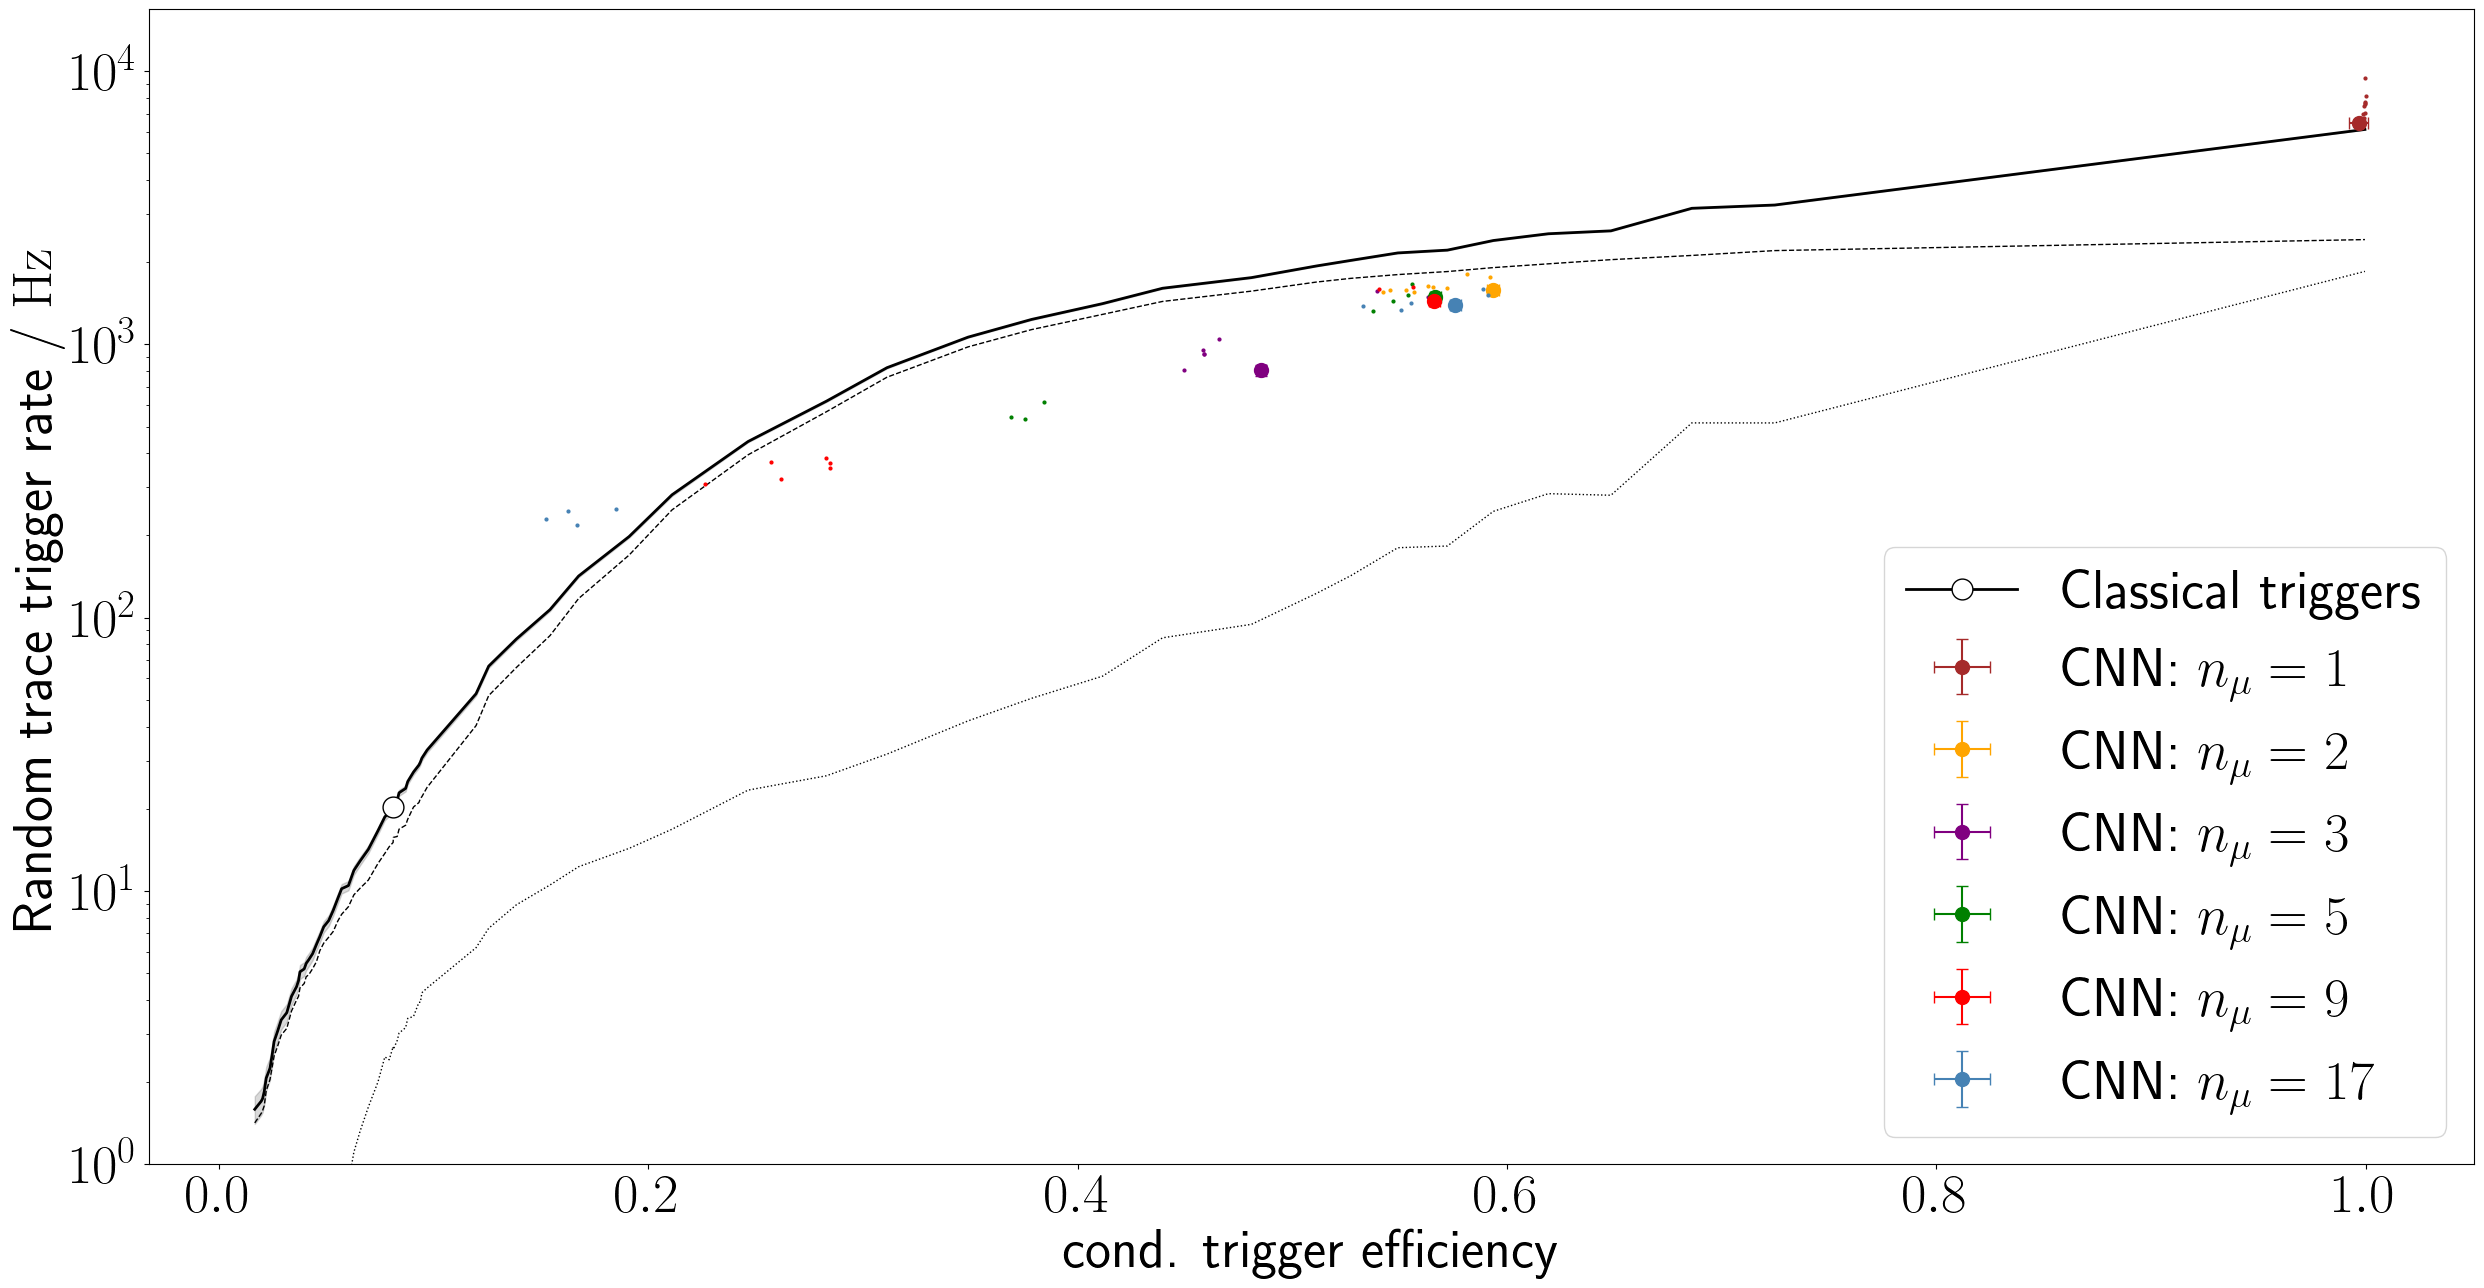

In [14]:
from Binaries import *

Plot = MoneyPlot("")

# Plot.add(AllEnergies, "validation_data")
Plot.add("120_TwoLayer_FullBandwidth_AllEnergies_NoCuts", "validation_data", label = f"CNN: $n_\mu = 1$", color = "brown")

c = ["orange", "purple", "green", "red", "steelblue"]

# 8 Muons NOT contained due to rate calculation not being finished yet
for i, i_muon in enumerate([1, 2, 4, 8, 16]):
    Plot.add(f"120_TwoLayer_FullBandwidth_AllEnergies_{i_muon}Muon", "validation_data_no_cuts", color = c[i], label = f"CNN: $n_\mu = {i_muon + 1}$")

# Plot.draw_line(label = "CNN, muon cut", color = "k")

# Plot.add("120_TwoLayer_FullBandwidth_AllEnergies_NoCuts", "validation_data", color = "orange")

# # 8 Muons NOT contained due to rate calculation not being finished yet
# for i_charge in ["0_2", "0_5", "1_0", "2_0", "5_0", "8_0"]:
#     Plot.add(f"120_TwoLayer_FullBandwidth_AllEnergies_{i_charge}VEM", "validation_data_no_cuts", color = "orange")

# Plot.draw_line(label = "CNN, charge cut", color = "orange", ls = "--")

# plt.text(0.5, 0.5, "Preliminary", rotation = 20, transform = plt.gca().transAxes, color = "red", fontsize = 100, 
#          verticalalignment = "center",
#          horizontalalignment = "center")

plt.ylim(1)

plt.legend()
# Plot()

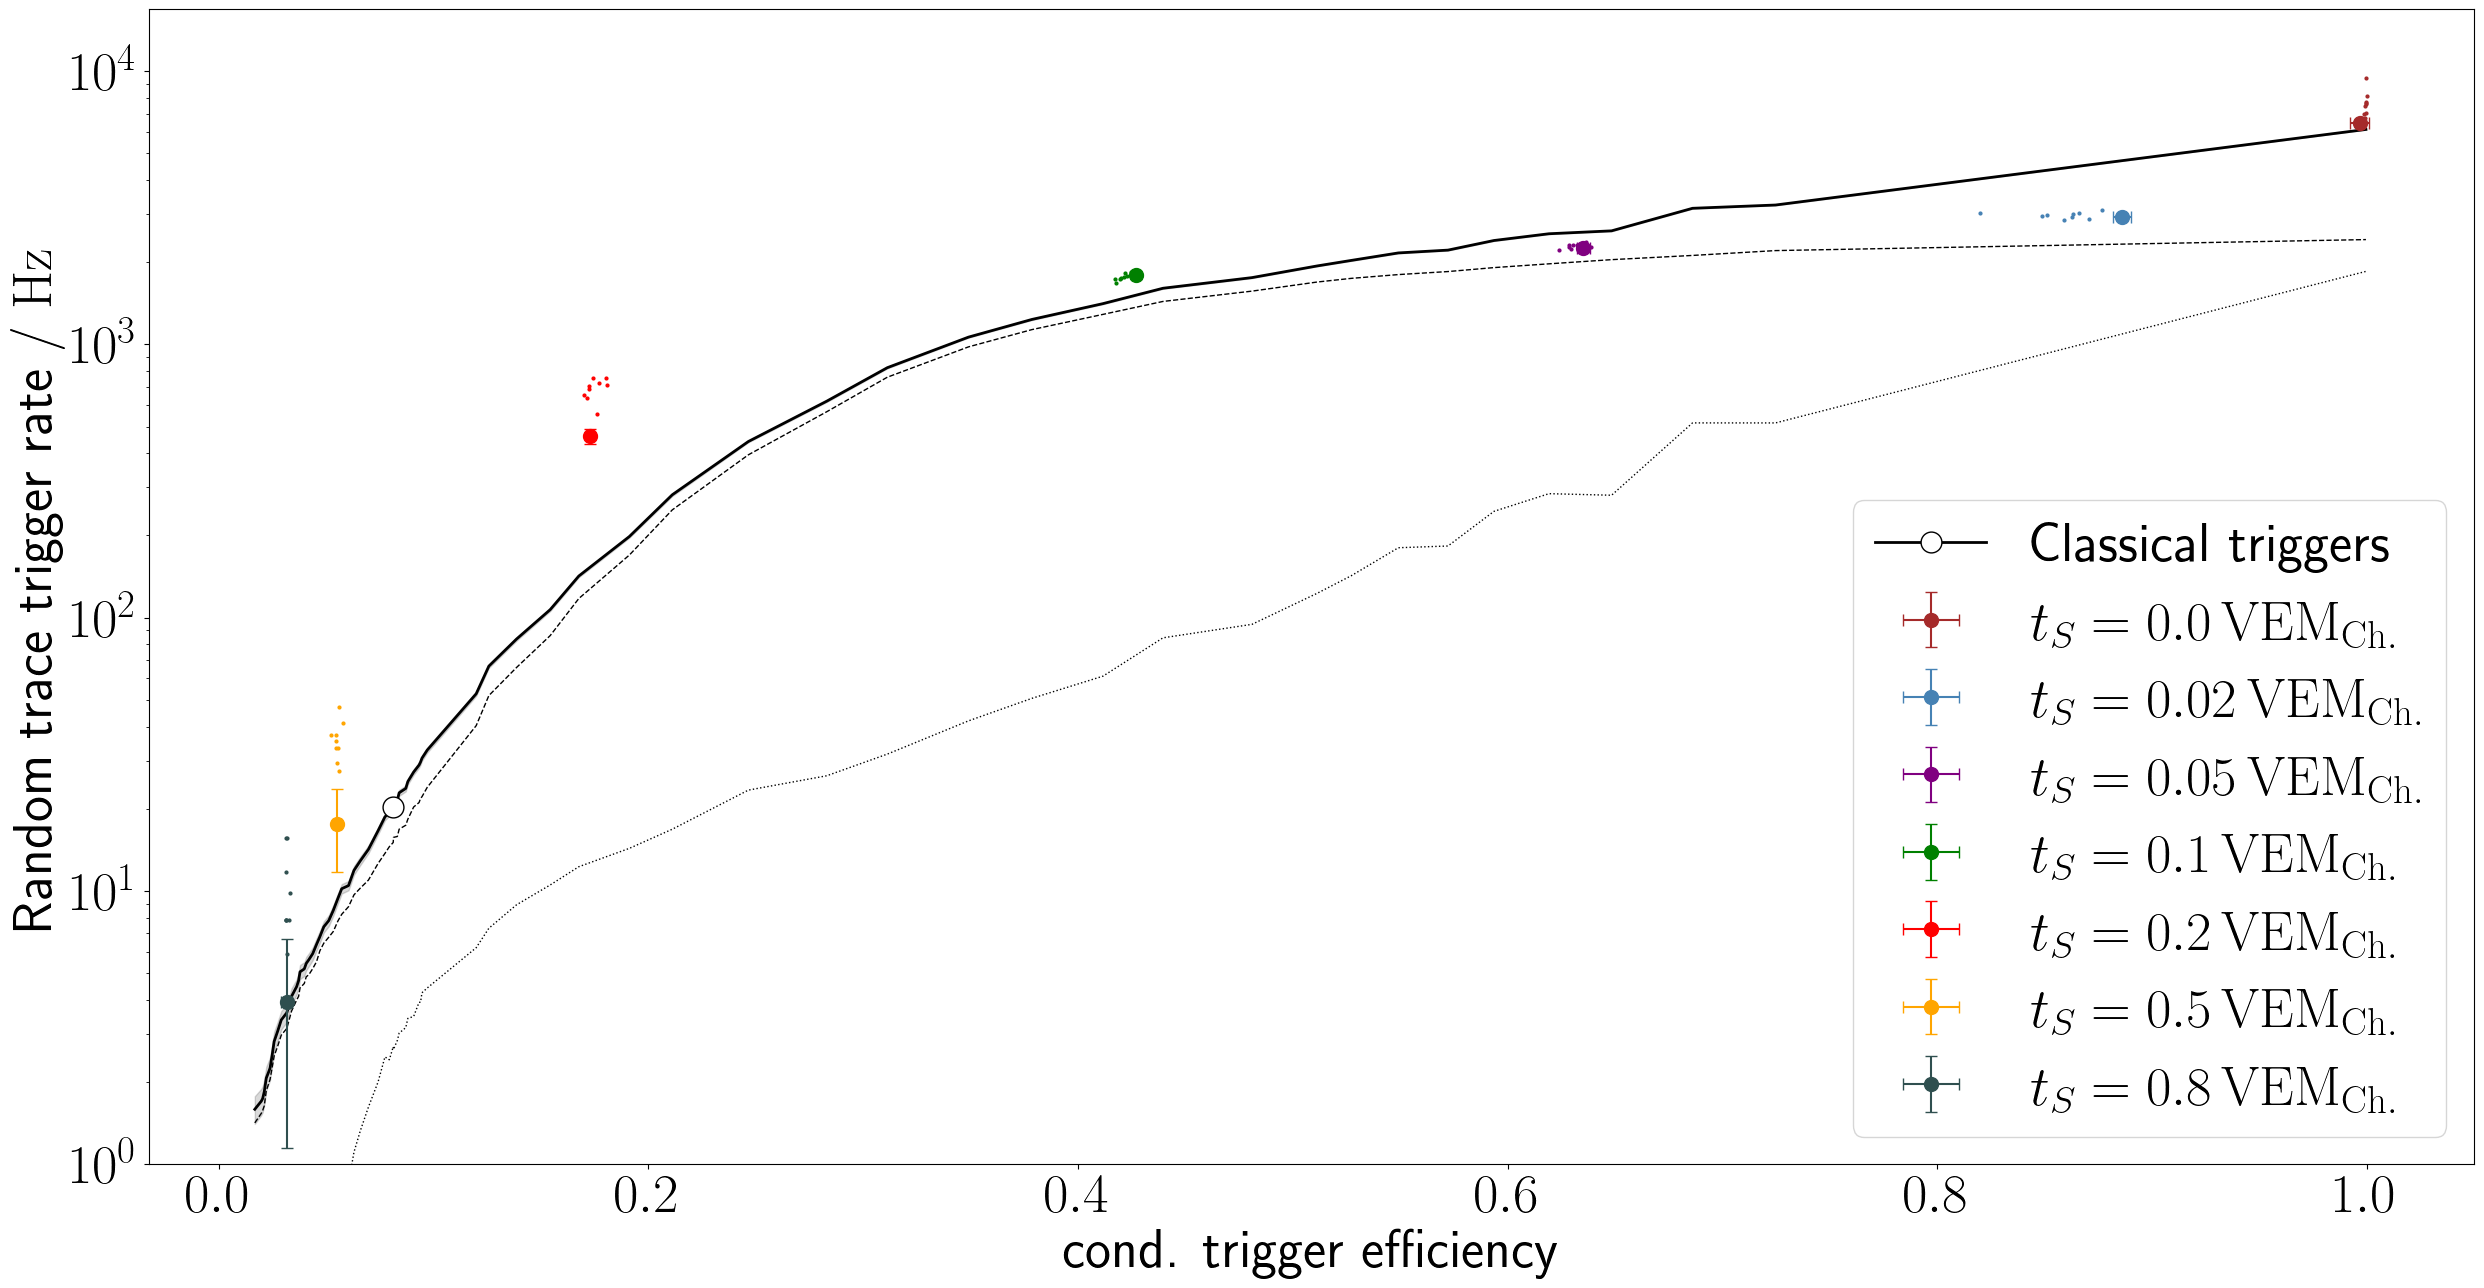

In [22]:
Plot = MoneyPlot("")

c = ["steelblue", "purple", "green", "red", "orange", "darkslategray"]
l = [0.02, 0.05, 0.1, 0.2, 0.5, 0.8]

Plot.add("120_TwoLayer_FullBandwidth_AllEnergies_NoCuts", "validation_data", color = "brown", label = f"$t_S = 0.0\,\mathrm{{VEM}}_{{\mathrm{{Ch.}}}}$")
for i, i_charge in enumerate(["0_2", "0_5", "1_0", "2_0", "5_0", "8_0"]):
    Plot.add(f"120_TwoLayer_FullBandwidth_AllEnergies_{i_charge}VEM", "validation_data_no_cuts", color = c[i], label = f"$t_S = {l[i]}\,\mathrm{{VEM}}_{{\mathrm{{Ch.}}}}$")

Plot()